# **Loan Default Prediction - Exploratory Data Analysis (EDA)**

--------------------------------
### **Context** 
-------------------------------
A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.

The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong
judgment/approval owing to human error and biases. 

There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not leam the biases that
previously crept in because of the human approval process.

----------------------------
### **Objective**
-----------------------------
A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

* Build a classification model to predict clients who are likely to default on their loan
* Give recommendations to the bank on the important features to consider while approving a loan. 

--------------------------
### **Data Description**
--------------------------
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Importing Data**

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm = pd.read_csv("/Users/neha/Desktop/hmeq.csv")


In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

#### **First and last 5 rows of the dataset**

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


#### **Shape of the dataset**

In [6]:
data.shape

(5960, 13)

**Insights** - Dataset contains information on 5960 loans each is represented by 12 features (including if they defaulted or not)

#### **Data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
* `REASON` AND `JOB` are the only object type features while the rest are numerical.
    * Will need to dummy encode these 2 features
* `BAD` and `LOAN` are the **only columns that dont contain Null values.**

#### **Analyze missing values**

In [8]:
# Number of missing values in each column
print(data.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [9]:
# Percentage of missing values in the each column.
print((data.isnull().sum())/5960*100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Insights**- Most columns are ~1-10% missing values, with DEBTINC(Debt-to-income ratio) 21% missing values.

### **Convert the data types**

**Convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category.
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
numerical_col = data.select_dtypes('number').columns

data[numerical_col] .describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**

`LOAN` - Average loan amount is ~18k with a range of ~11k-90k. 
 * 25% of loans are 11k (perhaps a standard base loan, with a large gap between th 75th percentile and max (perhaps an outlier or a special case loan)
    
`MORTDUE` - Averge amonth left on the morgage is ~73k with a range of 2k-400k
  * Some null rows (~500) indicating perhaps some clients have paid off their morgage or do not have one. 
  * Large gap between the 75th percentile and max, perhaps indicating the presense of outliers 
    
`VALUE` - Average value of property is ~101k with a range of 8k-855k

`YOJ` (years at present job): - Average YOJ is ~9 years with a range of 0-41 years.

`DEROG` (number of serious delinquency or late payments): - Average DEROG is 0 which is also the DEROG for over 75% of the loans, indicating the bank rarely gives out loans with delinquency or late payments.
   * The max jumps up to 10 delinquencies **indicating a likely outlier**.
    
 `DELINQ`(number of delinquent credit lines) - Average DELINQ is 0 which is also the DELINQ for over 75% of the loans, indicating the bank rarely gives out loans with delinquency or late payments.
   * The max jumps up to 10 delinquencies **indicating a likely outlier**.
    
 `CLAGE` (age of oldest credit line in months) - Average CLAGE is 179 (14y) with a range of 0-1168(97y). 
   * While it is possible for someone to have had a line of credit for 97 years that is **likely an outlier**.
    
 `NINQ` (number of recent credit inquiries) - Average NINQ is 1 with 25% having 0. 
   * The jump between the 75th percentile and max indicates a **likely outlier**.
    
 `CLNO` (number of existing credit lines) - Average CLNO is 21 with a range of 0-71, this suggests that most loans are going to those who have taken out multiple lines of credit. 
   * Large gap between the 75th percentile and max, perhaps indicating the presense of outliers 
    
`DEBTINC` (dept to income ration) - Average DEPTINC is ~33 with a range of 0.5-203
   * The jump between the 75th percentile and max indicates a **likely outlier**.

In [15]:
# Check summary for categorical data 
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**

`REASON` (Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation))
* A number ~200 are null values
`JOB` There are in total 6 different job cathegories 
* of the jobs most loans go to those in the "other" cathegory
* A number ~300 are null values


**Let's look at the percent of unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*50)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
**************************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
**************************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
**************************************************


**Insights**
`BAD:` - 
* Most loans are repaid 4771/5960 (80%)

`REASON:` 
* Most loans are for dept consolidation (~ 68%) vs home improvement (~ 31%)

`JOB:` 
* Job cathegories consist of sales, self empoloyed, manager, office, proffesional executive, and other
* Most loans are given to other (42%) and proffesional executive (22%), with the fewest going to self employed (3%) and sales (2%)

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

### **1. Univariate Analysis - Numerical Data**


In [17]:
# Function that will create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### **Histogram and Boxplots for Numerical Data**

**Histogram and Boxplot for LOAN**

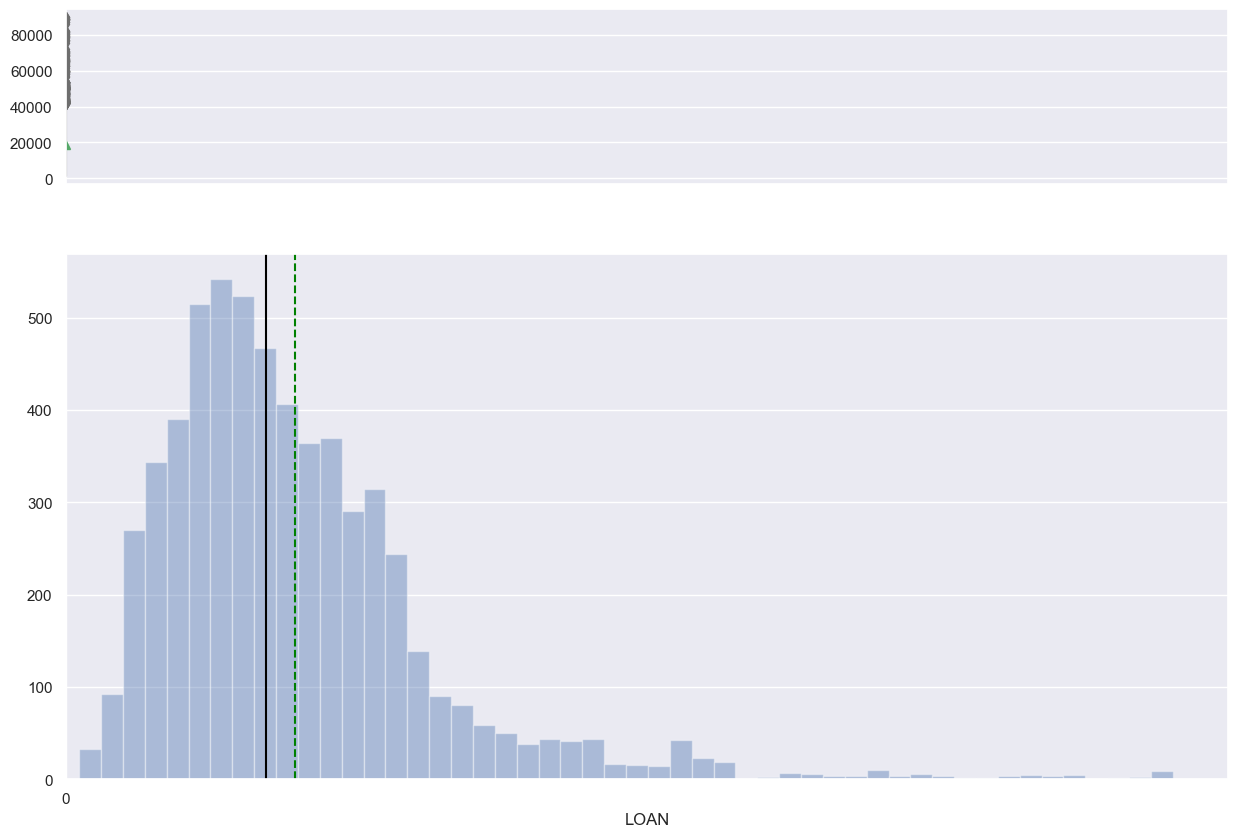

In [18]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
Considering the number of outliers outside of the 75th percentile, it is likely this is not an error. Rather the bank is likely giving most loans below the 75th percentile and only going above that in a few cases. 

**Histogram and Boxplot for MORTDUE**

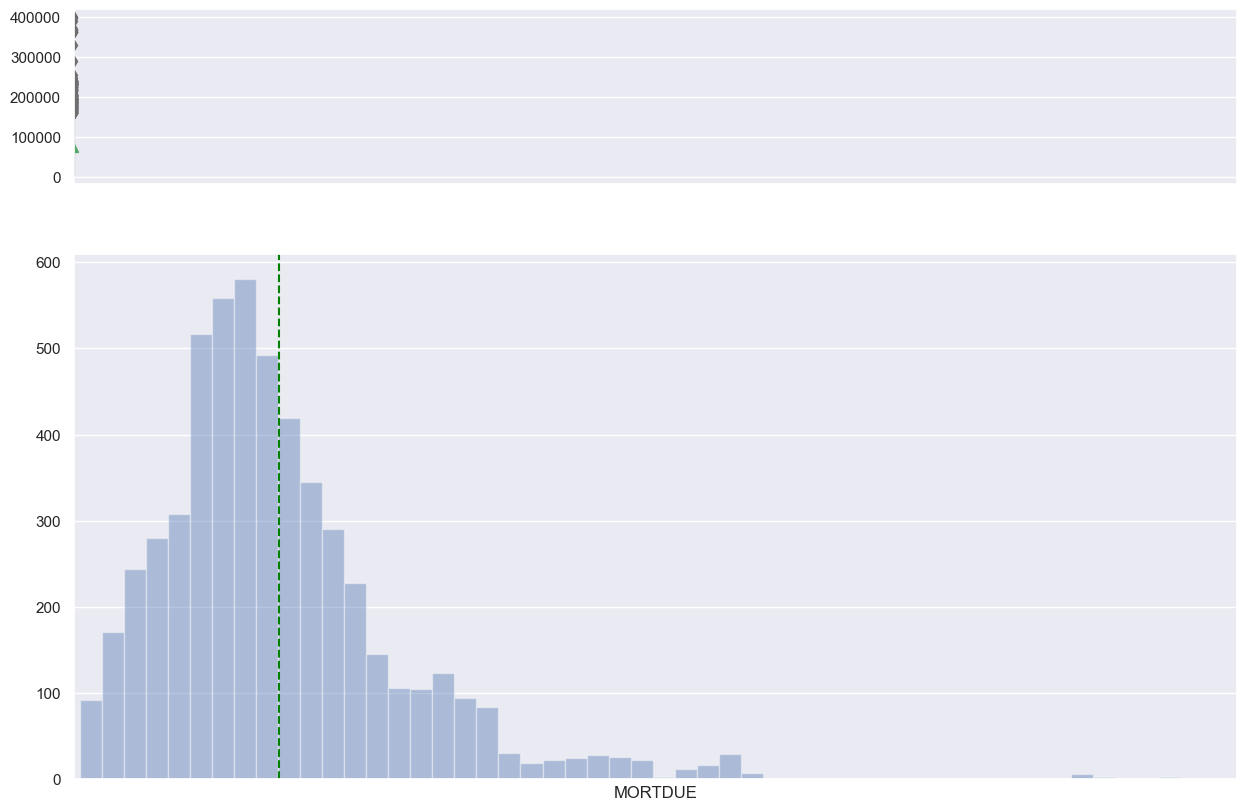

In [19]:
histogram_boxplot(data['MORTDUE'])

**Insights** Considering the number of outliers outside of the 75th percentile, it is likely this is not an error.

**Histogram and Boxplot for VALUE**

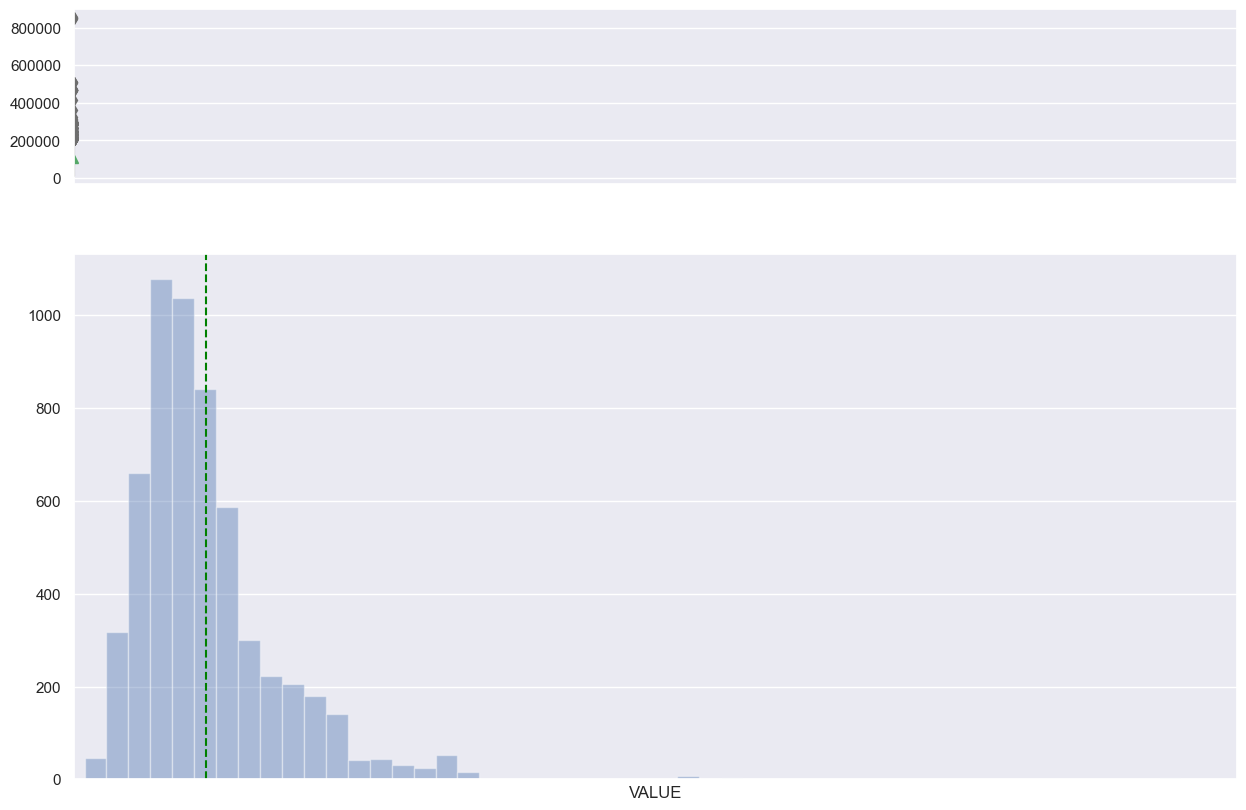

In [20]:
histogram_boxplot(data['VALUE'])

**Histogram and Boxplot for YOJ**

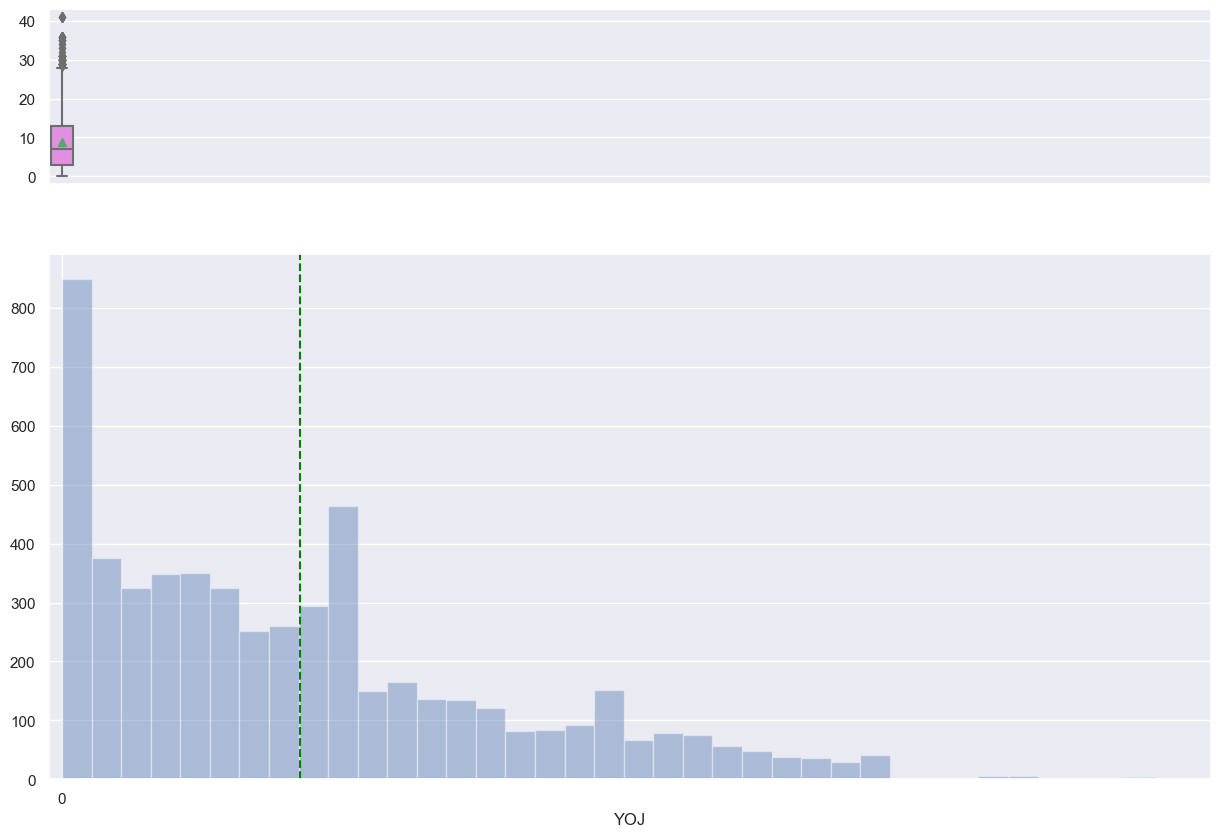

In [21]:
histogram_boxplot(data['YOJ'])

**Insights** Even though there are only a few outliers it follows the trend of the data and is likely not an outlier. 

**Histogram and Boxplot for DEROG**

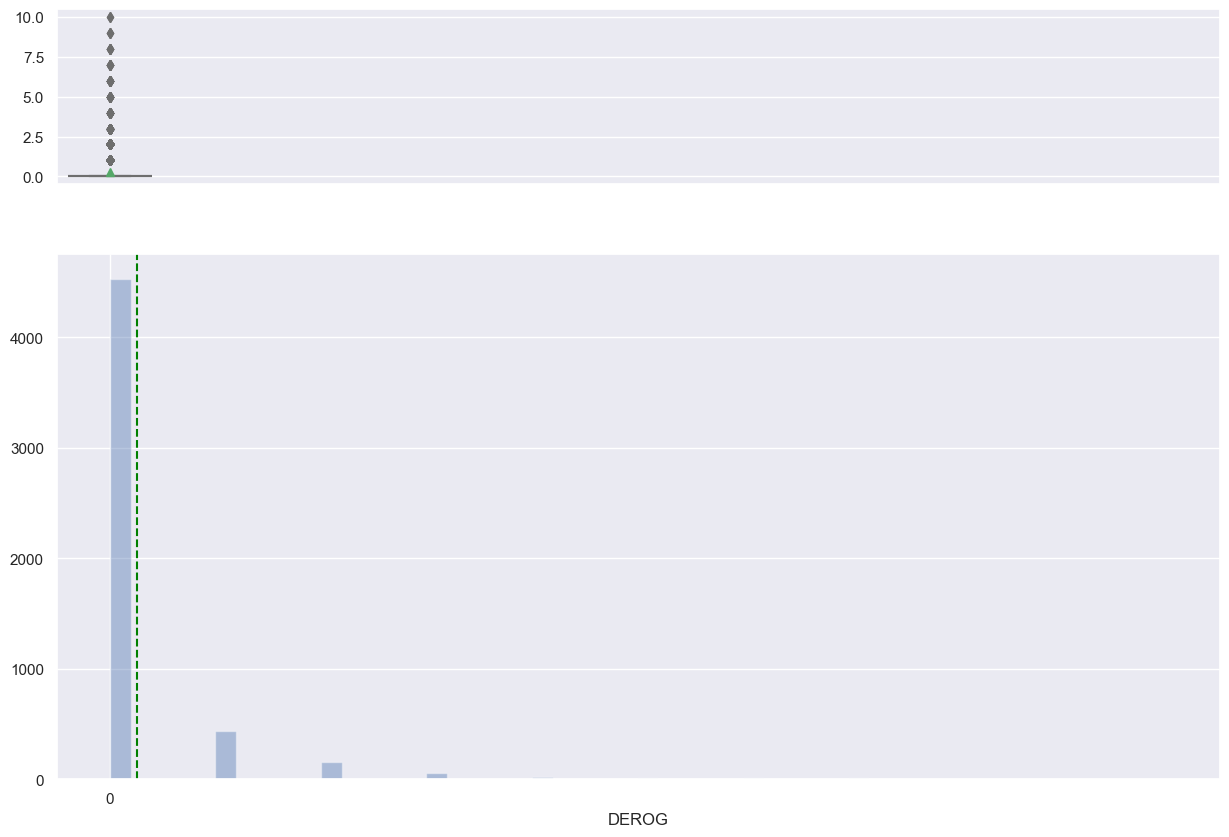

In [22]:
histogram_boxplot(data['DEROG'])

hard to say if these are outliers or just special cases.

**Histogram and Boxplot for DELINQ**

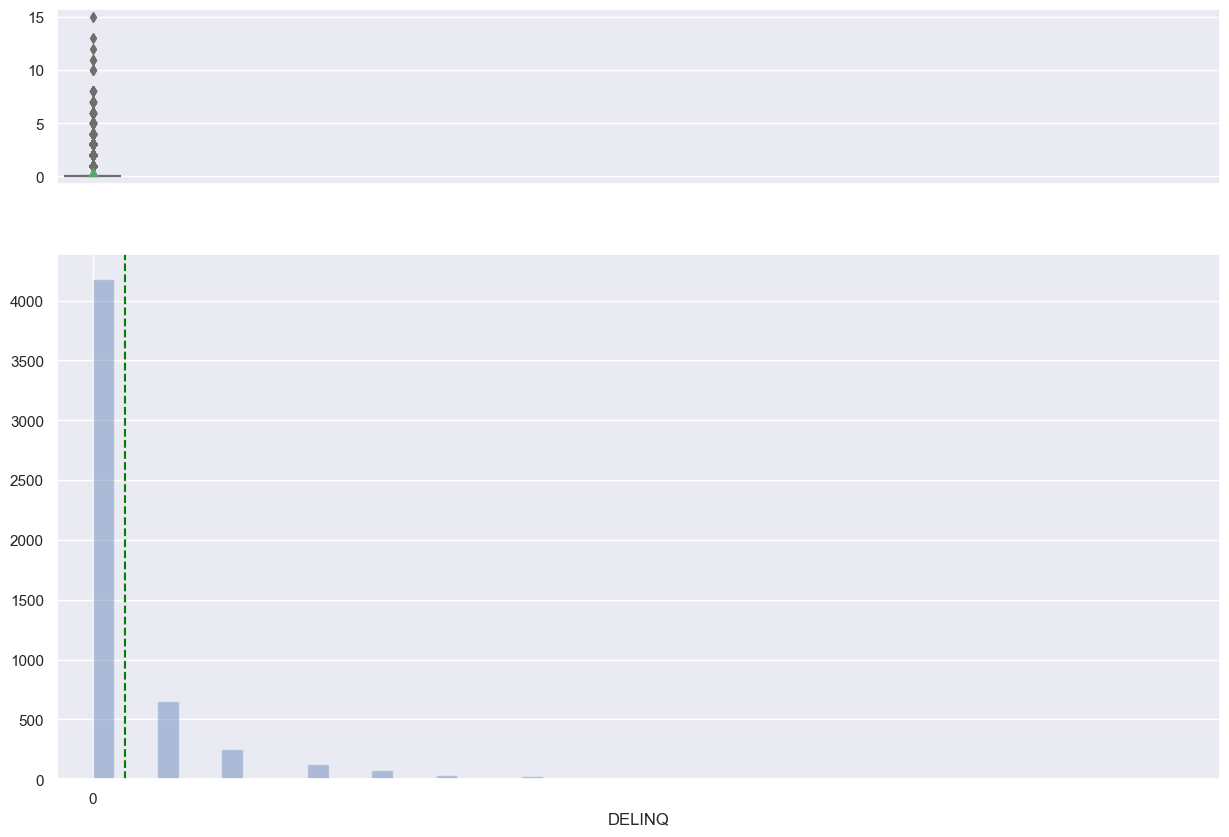

In [23]:
histogram_boxplot(data['DELINQ'])

hard to say if these are outliers or just special cases.

**Histogram and Boxplot for CLAGE**|

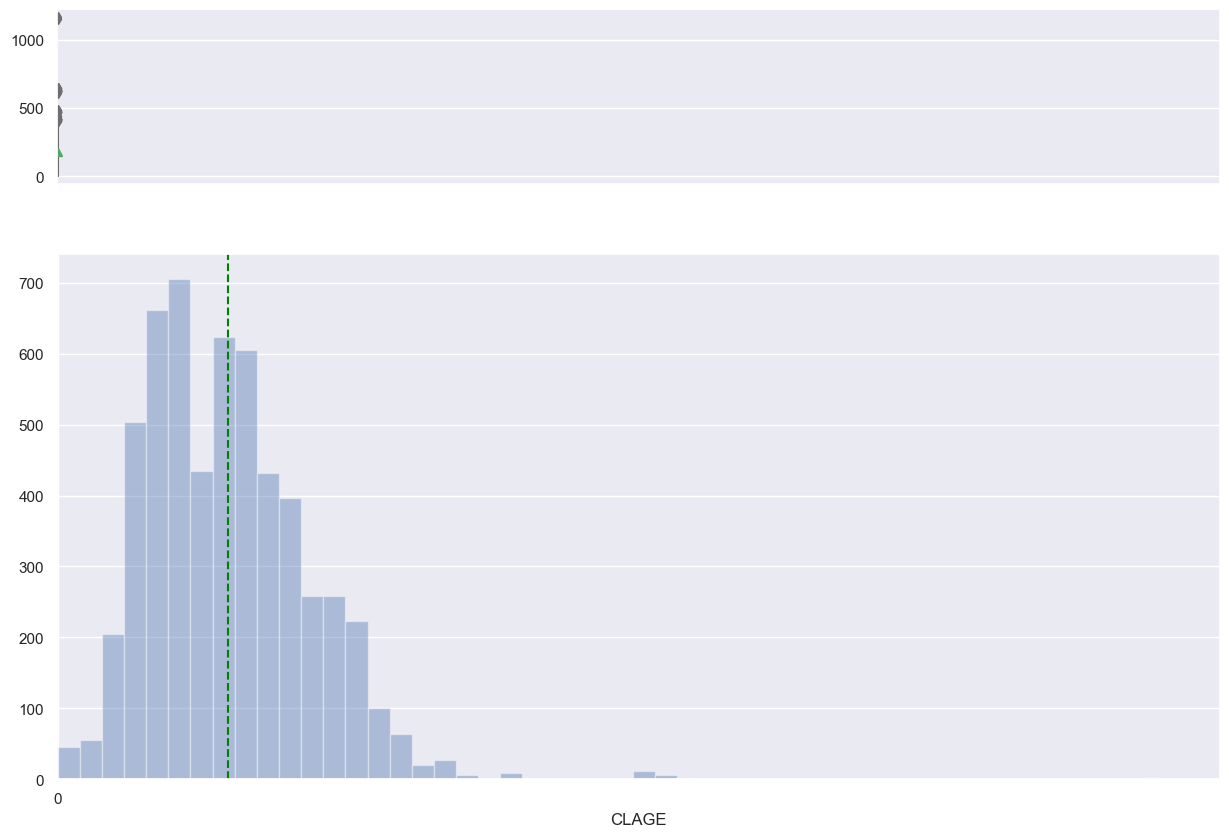

In [24]:
histogram_boxplot(data['CLAGE'])

**Insights** - Given the spread of data points it is **highly likely that the 2 max outliers are errors. Should remove them as to not contaminate the data. 

**Histogram and Boxplot for NINQ**

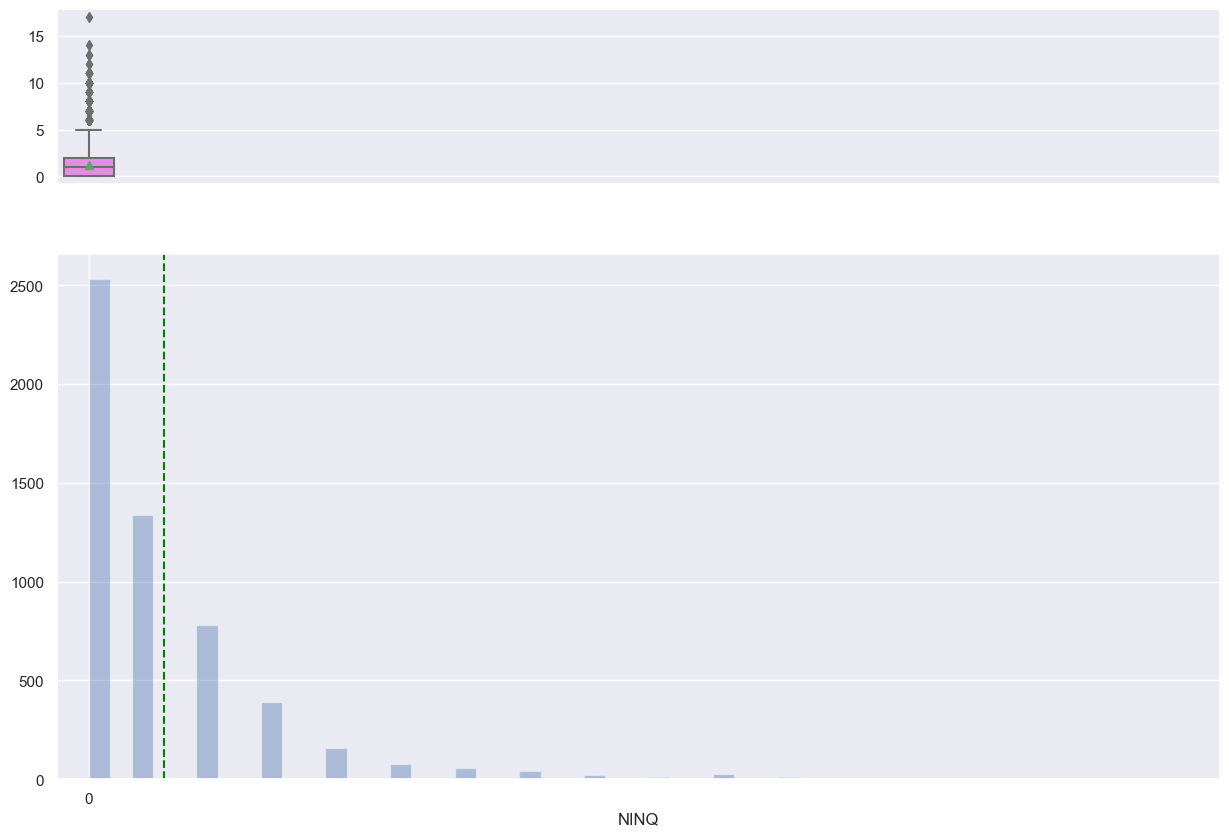

In [25]:
histogram_boxplot(data['NINQ'])

**Insights** Looks more like special cases, rather than outliers, as it follows the curve the data. 

**Histogram and Boxplot for CLNO**

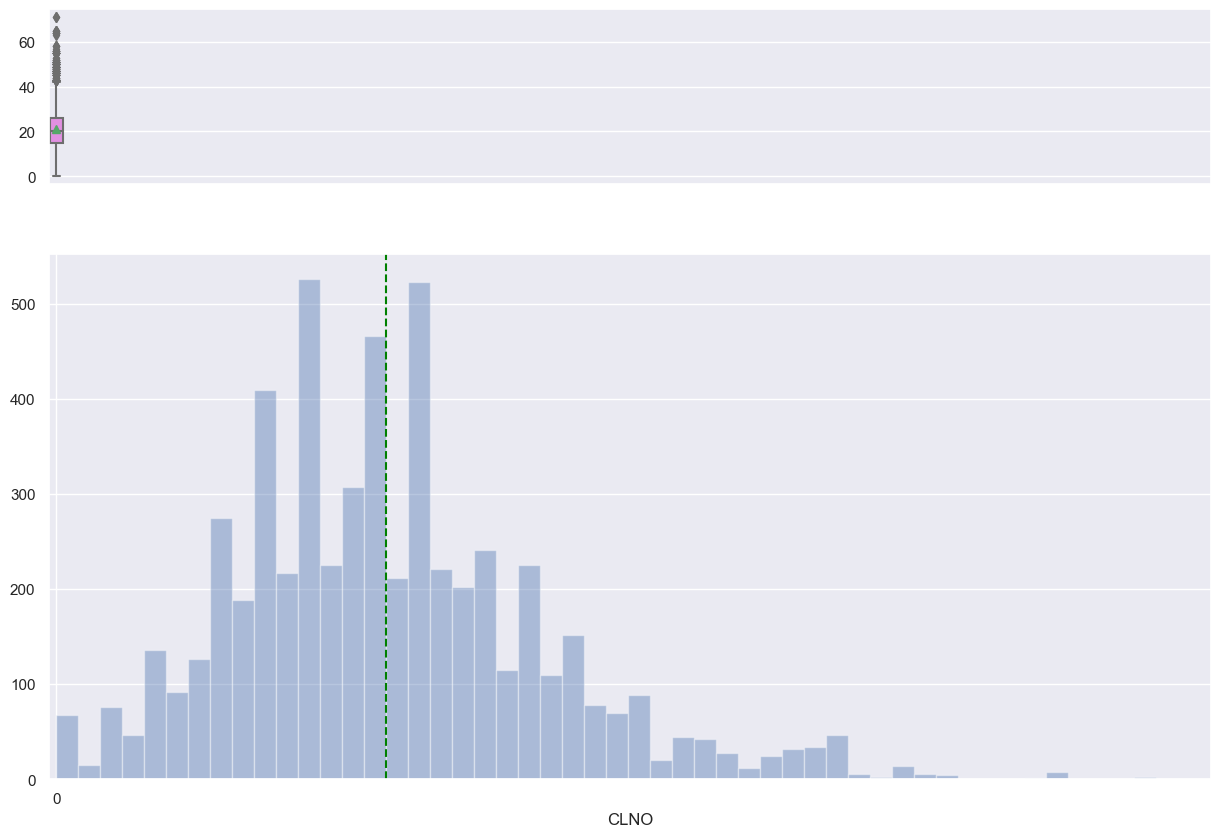

In [26]:
histogram_boxplot(data['CLNO'])

**Histogram and Boxplot for DEBTINC**

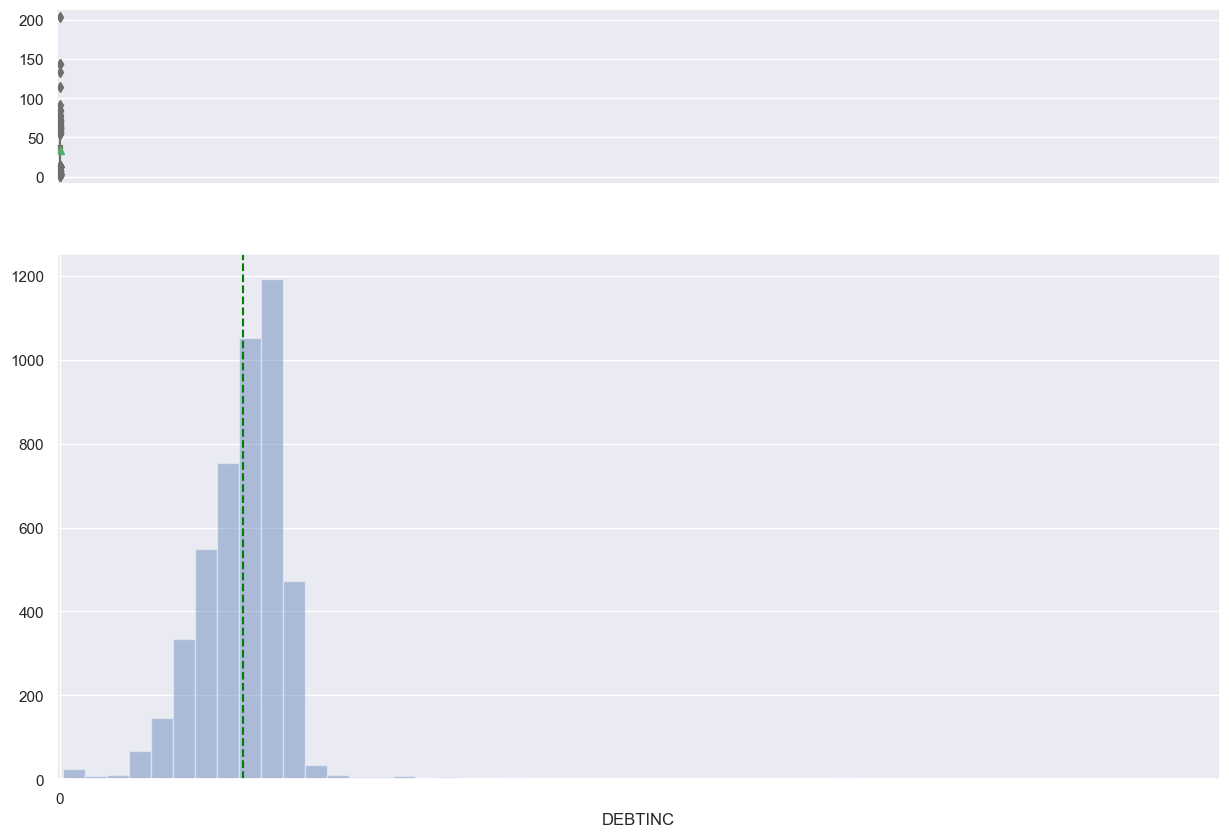

In [27]:
histogram_boxplot(data['DEBTINC'])

**Insights** Last outlier is likely an **error, should remvoe it.**

### **2. Univariate Analysis - Categorical Data**

In [28]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

### **Barplot for Categorical Data**

**Analyze Barplot for REASON**

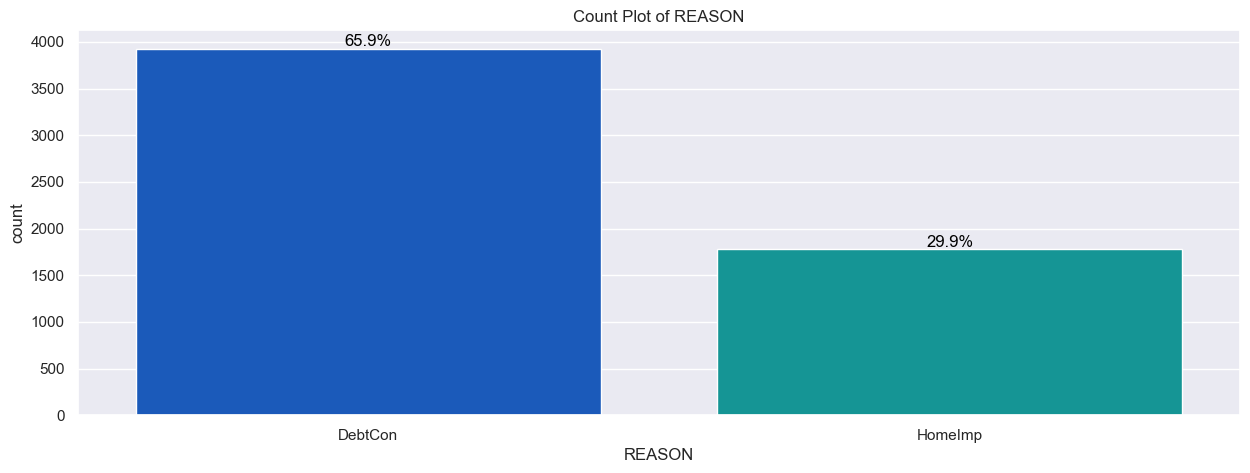

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and contains a column 'REASON'

# Function to annotate the percentages on the bars
def perc_on_bar(ax, data_column):
    total = len(data_column)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Create the bar plot
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='REASON', data=data, palette='winter')

# Add percentage labels on the bars
perc_on_bar(ax, data["REASON"])

# Display the plot
plt.title('Count Plot of REASON')
plt.show()


**Analyze Barplot for JOB**

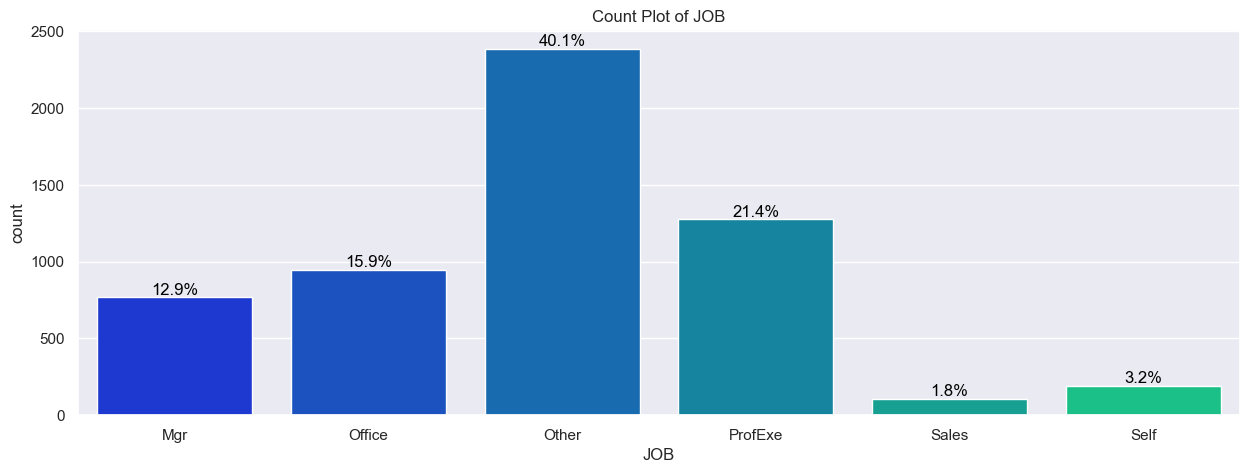

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and contains a column 'JOB'

# Function to annotate the percentages on the bars
def perc_on_bar(ax, data_column):
    total = len(data_column)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Create the bar plot for the 'JOB' column
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='JOB', data=data, palette='winter')

# Add percentage labels on the bars
perc_on_bar(ax, data["JOB"])

# Display the plot
plt.title('Count Plot of JOB')
plt.show()


### **Key Take Aways**

`CLAGE` AND `DEBTINC` both have outliers that are likely errors. Will adjust both.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

**Analyze BAD vs Loan**

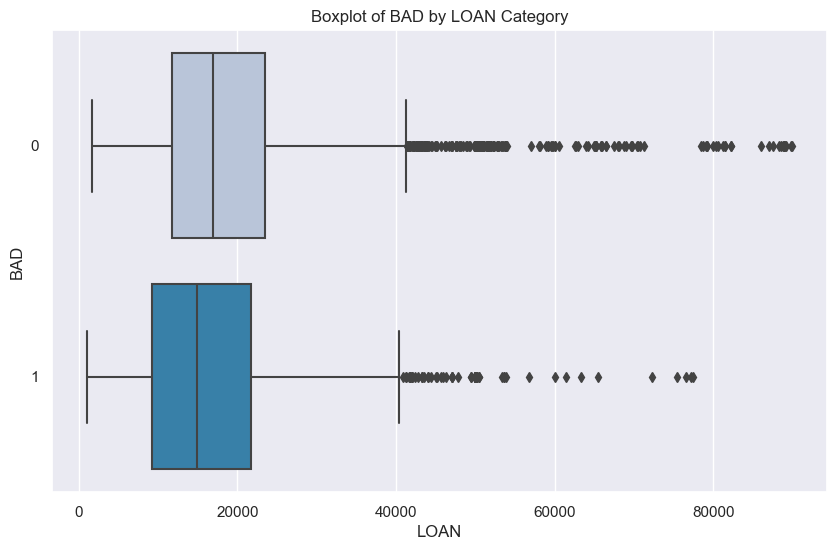

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing columns 'BAD' and 'LOAN'
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='LOAN', y='BAD', data=data, palette='PuBu')

# Display the plot
plt.title('Boxplot of BAD by LOAN Category')
plt.show()


**Insights**
Loan amount doesnt seem to have a great effect on defaults

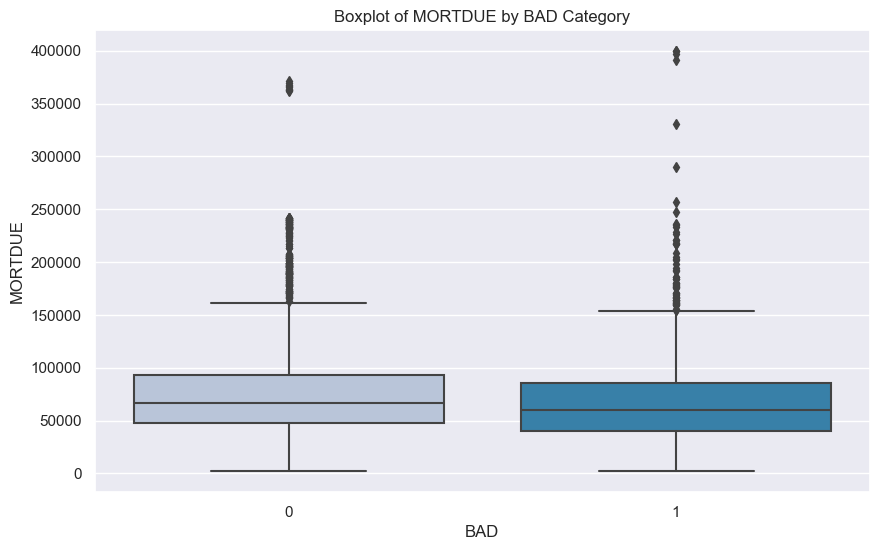

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing columns 'BAD' and 'MORTDUE'
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='BAD', y='MORTDUE', data=data, palette='PuBu')

# Display the plot
plt.title('Boxplot of MORTDUE by BAD Category')
plt.show()


**Insights** Amount due on existing mortgae does not seem to have a great impact on defaults. 

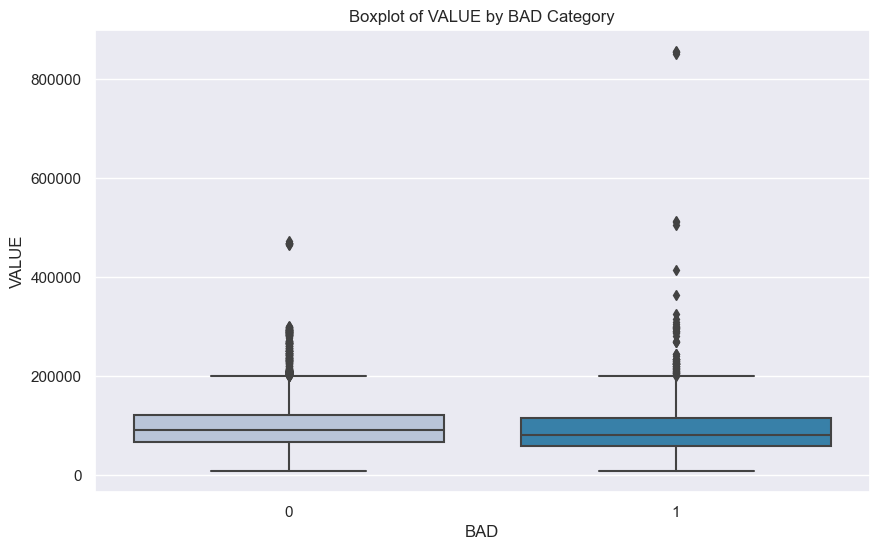

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing columns 'BAD' and 'VALUE'
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='BAD', y='VALUE', data=data, palette='PuBu')

# Display the plot
plt.title('Boxplot of VALUE by BAD Category')
plt.show()


**Insights** Property value doesnt seem to have a great effect on default.

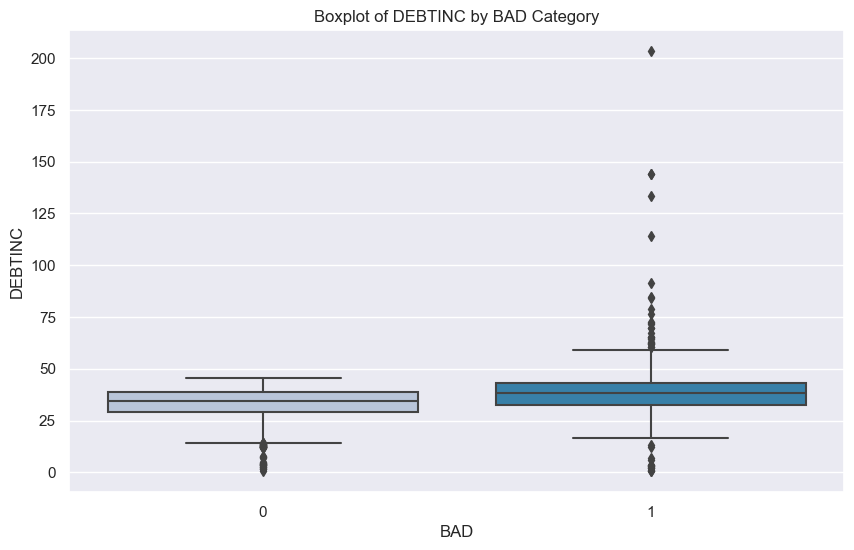

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing columns 'BAD' and 'DEBTINC'
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='BAD', y='DEBTINC', data=data, palette='PuBu')

# Display the plot
plt.title('Boxplot of DEBTINC by BAD Category')
plt.show()


**Insights** - **Greater debt to income ratio does seem to result in more defaults**

### **Bivariate Analysis: Two Continuous Variables**

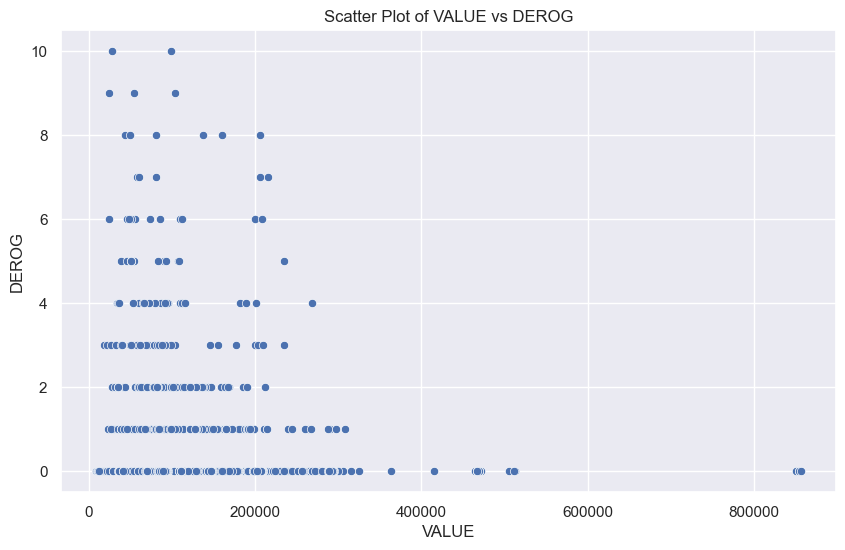

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing columns 'VALUE' and 'DEROG'
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='VALUE', y='DEROG', data=data)

# Display the plot
plt.title('Scatter Plot of VALUE vs DEROG')
plt.show()


In [ ]:
sns.scatterplot(data["VALUE"],data['DELINQ'],palette="PuBu")

**Insights:** Very high value properties have less chance of credit issues.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

**Plot stacked bar plot for for LOAN and JOBS**

In [ ]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights** Slightly **higher defaults in SALES and SELF, but each job contains defaulters.**

**Plot stacked bar plot for for LOAN and DEROG**

In [ ]:
stacked_plot(data['DEROG'])

**Plot stacked bar plot for for LOAN and DELINQ**

In [ ]:
stacked_plot(data['DELINQ'])

**Insights** **As DEROG and DELINQ increase it is highly likely that the loan will default. Especially when DEROG>6 and DELINQ>5 that every loan is defaulted marks a clear cutoff point.**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data = data, hue = 'BAD', palette= ['blue','red'])

## Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR   #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

### **Checking that outliers have been removed**

In [ ]:
histogram_boxplot(data['VALUE'])
histogram_boxplot(df_raw['VALUE'])

## **Treating Null Values**

#### Adding new columns in the dataset for each column which has missing values 

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.median

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].mode

**Check there are no longer null values**

In [ ]:
data.info()
print('*'*50)
df_raw.info()